### 전처리와 최적화
  - 교수님 강의노트 + 내 필기

##### 데이터 전처리

- 데이터 전처리의 정의
  - 데이터의 품질을 올리는 과정
- 데이터 전처리 과정
  - 데이터 실수화
  - 불완전한 데이터 제거 (NULL, NA, NAN값 제거)
  - 잡음 섞인 데이터 제거
  - 모순된 데이터 제거
  - 불균형 데이터 해결
- 데이터 전처리의 주요 기법
  - 데이터 실수화
  - 데이터 정제
  - 데이터 통합
  - 데이터 축소
  - 데이터 변환
  - 데이터 균형


- 데이터 실수화
  - 2차원 자료의 예시: [n_sample, n_features] -> 2차원 자료는 행렬 혹은 2차원 텐서라 불림
  - One-hot encoding을 이용한 데이터 실수화 -> 아래 실습 예시 참고!

In [ ]:
# 범주형 자료의 수량화 =====================================================
x=[{'city':'seoul','temp':10.0}, {'city':'Dubai', 'temp':33.5}, {'city':'LA','temp':20.0}]
x

[{'city': 'seoul', 'temp': 10.0},
 {'city': 'Dubai', 'temp': 33.5},
 {'city': 'LA', 'temp': 20.0}]

In [ ]:
from sklearn.feature_extraction import DictVectorizer
vec=DictVectorizer(sparse=False)
vec.fit_transform(x) # X를 범주형 수량화 자료로 변환

array([[ 0. ,  0. ,  1. , 10. ],
       [ 1. ,  0. ,  0. , 33.5],
       [ 0. ,  1. ,  0. , 20. ]])

In [ ]:
# 희소행렬(Sparse Matrix) -> 행렬의 값이 대부분 0인 경우를 가리키는 표현
# 희소 행렬은 프로그램 시 불필요한 0 값으로 인해 메모리 낭비가 심함
# 이 문제를 COO 표현식과 CSR 표현식을 통해 해결 

vec1=DictVectorizer(sparse=True) # 메모리를 줄이기 위해 sparse=True
x1=vec1.fit_transform(x)
x1

<3x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [ ]:
x1.toarray() # sparse=True를 풀고 배열로 변경
vec1.get_feature_names() 

['city=Dubai', 'city=LA', 'city=seoul', 'temp']

In [ ]:
# 텍스트 자료의 수량화 =====================================================
text=['떴다 떴다 비행기 날아라 날아라',
      '높이 높이 날아라 우리 비행기',
      '내가 만든 비행기 날아라 날아라',
      '멀리 멀리 날아라 우리 비행기']
text

['떴다 떴다 비행기 날아라 날아라',
 '높이 높이 날아라 우리 비행기',
 '내가 만든 비행기 날아라 날아라',
 '멀리 멀리 날아라 우리 비행기']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec2 = CountVectorizer()# default는 sparse=True
t=vec2.fit_transform(text).toarray() # sparse=True를 풀고 text를 수량화 배열 자료로 변환
import pandas as pd
t1=pd.DataFrame(t, columns=vec2.get_feature_names())
t1

,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,2,0,0,2,0,0,1,0
1,1,0,2,0,0,0,1,1
2,2,1,0,0,1,0,1,0
3,1,0,0,0,0,2,1,1


- 출현 횟수가 정보의 양과 비례하는 것은 아님. 때문에 TF-IDF 기법을 이용해야 함
  - TF-IDF(Term Freauency Inverse Document Frequency)
  - 자주 등장하여 분석에 의미를 갖지 못하는 단어의 중요도를 낮추는 기법 ex) The, a 등의 관사

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer()
x2=tfid.fit_transform(text).toarray() # 높은 빈도는 낮은 가중치, 낮은 빈도는 높은 가중치
# toarray() -> 마찬가지로 CSR 표현의 압축을 풀기 위해 사용
x3=pd.DataFrame(x2,columns=tfid.get_feature_names())
x3

,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,0.450735,0.000000,0.00000,0.86374,0.000000,0.00000,0.225368,0.000000
1,0.229589,0.000000,0.87992,0.00000,0.000000,0.00000,0.229589,0.346869
2,0.569241,0.545415,0.00000,0.00000,0.545415,0.00000,0.284620,0.000000
3,0.229589,0.000000,0.00000,0.00000,0.000000,0.87992,0.229589,0.346869




---



- 데이터 변환
  - 데이터 변환의 필요성
    - 머신러닝은 데이터가 가진 특성(Featrue)들을 비교하여 데이터 패턴을 찾음
    - 데이터가 가진 특성 간 스케일 차이가 심하면 패턴을 찾는데 문제가 발생함
    - ex) 표준화, 정규화 -> 정규화가 더 유용 BUT, 데이터 특성이 종모양이거나 이상치가 있을 경우에는 표준화가 유용
- 데이터 정제
  - 결측 데이터 채우기 -> 아래 실습 예시 참고!
    - 결측 데이터: np.nan, npNAN, None
    - 평균, 중위수, 최빈수로 대처하는 기법 사용
    - 사용 가능 함수: sklearn의 Imputer(): 입력인자로 평균, 중위수, 최빈수 선택

In [ ]:
import numpy as np
# 결측자료 대체 ===================================================== 
x_miss=np.array([[1,2,3,None],[5,np.NAN,7,8],[None,10,11,12],[13,np.nan,15,16]])
x_miss

array([[1, 2, 3, None],
       [5, nan, 7, 8],
       [None, 10, 11, 12],
       [13, nan, 15, 16]], dtype=object)

In [ ]:
from sklearn.impute import SimpleImputer
im = SimpleImputer(missing_values=np.nan, strategy='mean')
im.fit(x_miss)

#from sklearn.preprocessing import Imputer
#im=Imputer(strategy='mean') 
#im.fit_transform(x_miss) # 열의 평균값으로 대체

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [ ]:
## 데이터 통합

#www.kaggle.com 으로 들어간 후 새로운 account를 생성하고 
#www.kaggle.com/c/rossmann-store-sales/data 에서 자료를 다운받는다. 
#zip을 풀어서 적절한 폴더(이경우 머신러닝교재)
import pandas as pd
df1=pd.read_csv("/content/sample_data/train.csv",engine='python')
print(df1.shape)
type(df1)

(252322, 9)


pandas.core.frame.DataFrame

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555.0,1.0,1.0,0,1.0
1,2,5,2015-07-31,6064,625.0,1.0,1.0,0,1.0
2,3,5,2015-07-31,8314,821.0,1.0,1.0,0,1.0
3,4,5,2015-07-31,13995,1498.0,1.0,1.0,0,1.0
4,5,5,2015-07-31,4822,559.0,1.0,1.0,0,1.0


In [ ]:
df2=pd.read_csv("/content/sample_data/store.csv",engine='python')
df2.shape

(1115, 10)

In [ ]:
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
df=pd.merge(df1,df2,on='Store')
df.shape

(1017209, 18)

In [ ]:
df.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, ADASYN

# n_feature 변경, n_informative와 n_redundant 추가
X, y = make_classification(n_classes=3, weights=[0.03, 0.07,0.9],n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_samples=200, random_state=10) # 2차원 데이터임을 알 수 있음, 3개의 클래스


print('Original dataset shape %s' % Counter(y)) # y에 클래스 정보가 들어 있음

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Original dataset shape Counter({2: 180, 1: 14, 0: 6})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


- 데이터 불균형
  - 머신러닝의 목적이 분류일 때, 특정 클래스의 관측치가 다른 클래스에 비해 매우 낮게 나타나면 이러한 자료를 불균형 자료라고 함
- 데이터 불균형 해소 기법
  - 과소표집, 과대표집
  - 일반적으로 과소표집보다 과대표집이 통계적으로 유용함
  - 의사결정나무와 앙상블은 상대적으로 불균형자료에 강한 특성을 보임
- 과소표집: 다수 클래스의 표본을 임의로 학습데이터로부터 제거하는 것
- 과대표집: 소수클래스의 표본을 복제하여 이를 학습데이터에 추가하는 것
  - 대표적인 방법론
    - SMOTE, ADASYN

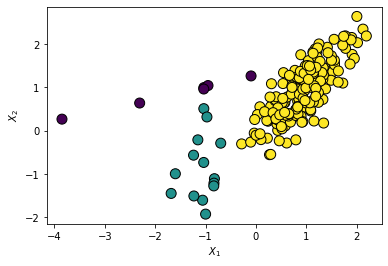

In [12]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=1)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [13]:
 # 과대표집

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({2: 180, 1: 180, 0: 180})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


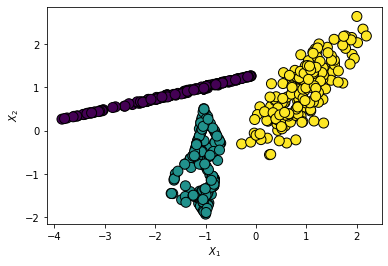

In [14]:
import matplotlib.pyplot as plt

plt.scatter(X_res[:, 0], X_res[:, 1], marker='o', c=y_res,
            s=100, edgecolor="k", linewidth=1)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [15]:
ada=ADASYN(random_state=0)
X_syn,y_syn=ada.fit_resample(X,y)
print('Resampled dataset shape from ADASYN %s' % Counter(y_syn))

Resampled dataset shape from ADASYN Counter({2: 180, 1: 179, 0: 178})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


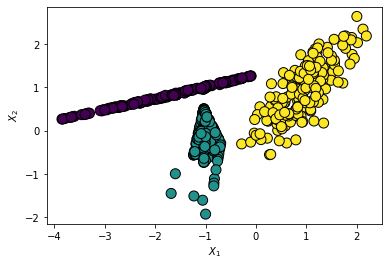

In [16]:
import matplotlib.pyplot as plt

plt.scatter(X_syn[:, 0], X_syn[:, 1], marker='o', c=y_syn,
            s=100, edgecolor="k", linewidth=1)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [17]:
# 과소표집

from imblearn.under_sampling import NearMiss

# define the undersampling method
undersample = NearMiss(version=3, n_neighbors_ver3=3)
# transform the dataset
X_Under, y_Under = undersample.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

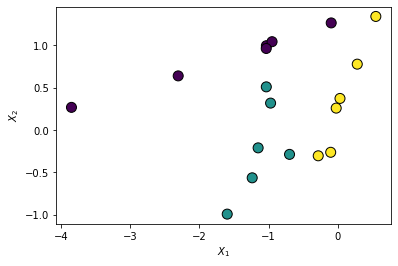

In [19]:
import matplotlib.pyplot as plt

plt.scatter(X_Under[:, 0], X_Under[:, 1], marker='o', c=y_Under,
            s=100, edgecolor="k", linewidth=1)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()